## Board Game Review Prediction

**Done by:**<br>Gabriel Egbenya<br>Board Game Review Prediction<br>AKA devgabriel

In this project, you’ll see how to perform a linear regression analysis by predicting the average reviews on a board game in this project.

## 1. Import Libraries

In [43]:
import numpy as np
import pandas as pd
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

## 2. Load the dataset

In [2]:
fileName = "games.csv.txt"
games = pd.read_csv(fileName)
games

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81307,184441,boardgameexpansion,Micro Rome: Aegyptus,2015.0,1.0,1.0,0.0,30.0,0.0,10.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81308,184442,boardgame,Trivial Pursuit: Marvel Cinematic Universe Da...,2013.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81309,184443,boardgame,BEARanoia,2015.0,2.0,15.0,1.0,1.0,1.0,0.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81310,184449,boardgame,Freight,2015.0,2.0,4.0,60.0,30.0,60.0,8.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000


## 3. Data visualization and profiling

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


(array([24380.,   606.,  1325.,  3303.,  6687., 12277., 15849., 11737.,
         3860.,  1288.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

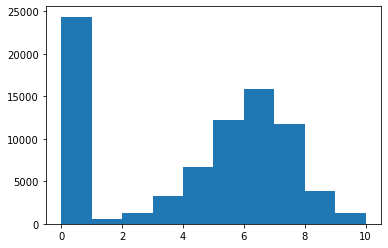

In [3]:
print(games.columns)
print(games.shape)

plt.hist(games['average_rating'])

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81312 entries, 0 to 81311
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    81312 non-null  int64  
 1   type                  81312 non-null  object 
 2   name                  81271 non-null  object 
 3   yearpublished         81309 non-null  float64
 4   minplayers            81309 non-null  float64
 5   maxplayers            81309 non-null  float64
 6   playingtime           81309 non-null  float64
 7   minplaytime           81309 non-null  float64
 8   maxplaytime           81309 non-null  float64
 9   minage                81309 non-null  float64
 10  users_rated           81312 non-null  int64  
 11  average_rating        81312 non-null  float64
 12  bayes_average_rating  81312 non-null  float64
 13  total_owners          81312 non-null  int64  
 14  total_traders         81312 non-null  int64  
 15  total_wanters      

In [5]:
#checking for missing values

print(games.isna().sum())

id                       0
type                     0
name                    41
yearpublished            3
minplayers               3
maxplayers               3
playingtime              3
minplaytime              3
maxplaytime              3
minage                   3
users_rated              0
average_rating           0
bayes_average_rating     0
total_owners             0
total_traders            0
total_wanters            0
total_wishers            0
total_comments           0
total_weights            0
average_weight           0
dtype: int64


In [6]:
#checking for missing values again

print(games.isnull().sum())

id                       0
type                     0
name                    41
yearpublished            3
minplayers               3
maxplayers               3
playingtime              3
minplaytime              3
maxplaytime              3
minage                   3
users_rated              0
average_rating           0
bayes_average_rating     0
total_owners             0
total_traders            0
total_wanters            0
total_wishers            0
total_comments           0
total_weights            0
average_weight           0
dtype: int64


In [7]:
games.head(10)

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943
5,31260,boardgame,Agricola,2007.0,1.0,5.0,150.0,30.0,150.0,12.0,39714,8.11957,8.03847,47522,837,958,6402,9310,5065,3.6160
6,124742,boardgame,Android: Netrunner,2012.0,2.0,2.0,45.0,45.0,45.0,14.0,15281,8.16760,7.97822,24381,680,627,3244,3202,1260,3.3103
7,96848,boardgame,Mage Knight Board Game,2011.0,1.0,4.0,150.0,150.0,150.0,14.0,12697,8.15901,7.96929,18769,367,1116,5427,2861,1409,4.1292
8,84876,boardgame,The Castles of Burgundy,2011.0,2.0,4.0,90.0,30.0,90.0,12.0,15461,8.07879,7.95011,20558,215,929,3681,3244,1176,3.0442
9,72125,boardgame,Eclipse,2011.0,2.0,6.0,200.0,60.0,200.0,14.0,15709,8.07933,7.93244,17611,273,1108,5581,3188,1486,3.6359


In [8]:
#viewing the categorical variables in the dataset

print(games["type"].unique())
print(games['type'].value_counts())
print(games["name"].unique())

['boardgame' 'boardgameexpansion']
boardgame             70820
boardgameexpansion    10492
Name: type, dtype: int64
['Twilight Struggle' 'Terra Mystica' 'Caverna: The Cave Farmers' ...
 'BEARanoia' 'Freight' 'Bingo Animal Kids']


In [9]:
#viewing the unique data in all columns in the dataset

print(games.nunique().sort_values(ascending=True).reset_index(name='count'))

                   index  count
0                   type      2
1             minplayers     24
2                 minage     35
3             maxplayers     89
4            minplaytime    123
5            playingtime    134
6            maxplaytime    134
7          yearpublished    323
8          total_traders    407
9          total_wanters    540
10         total_weights    657
11         total_wishers   1130
12        total_comments   1216
13           users_rated   2147
14          total_owners   2995
15        average_weight   3376
16  bayes_average_rating  12681
17        average_rating  17564
18                  name  76035
19                    id  79463


## 4. Filtering the dataset

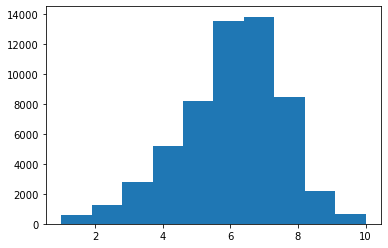

In [10]:
#select only data with reviews
games = games[games["users_rated"] > 0]

#drop missing values
games = games.dropna(axis=0)


# Make a histogram of all the ratings in the average_rating column.
plt.hist(games["average_rating"])

# Show the plot.
plt.show()

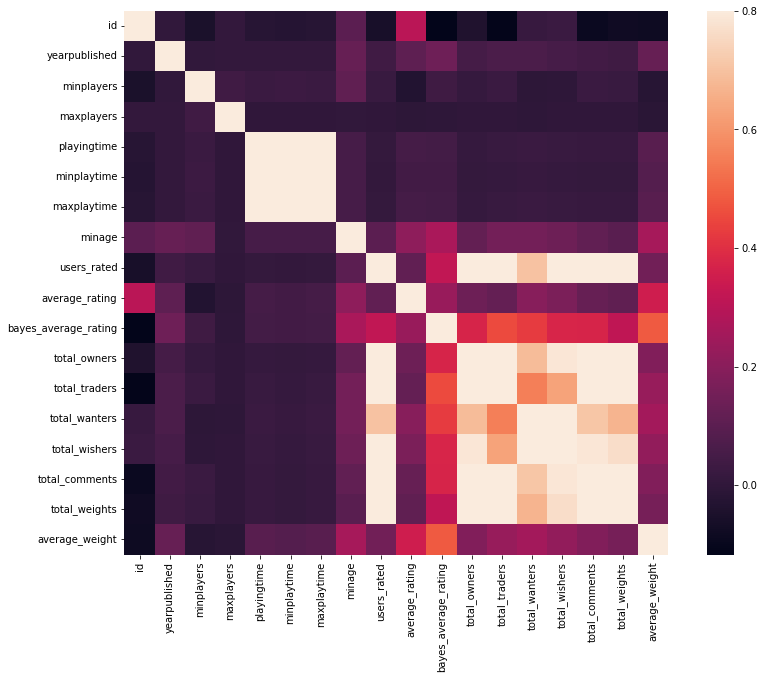

In [11]:
#correlation matrix
cormat = games.corr()
fig = plt.figure(figsize = (14, 10))
sns.heatmap(cormat, vmax=.8, square=True);
plt.show()

## 5. Split the data into features and response.

In [14]:
# #select the relevant features for prediction

columns = games.columns.tolist()
columns = [c for c in columns if c not in ['average_rating', 'bayes_average_rating', 'id', 'name', 'type']]

features = games[columns]
X = features

#select the response for prediction
response = games['average_rating']
y = response

 ## 6. Split the DataFrame into Training and Testing set

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42 )

In [24]:
print('X_train data',X_train.shape)
print('y_train data',y_train.shape)
print('X_test data',X_test.shape)
print('y_test data',y_test.shape)

X_train data (45515, 15)
y_train data (45515,)
X_test data (11379, 15)
y_test data (11379,)


## 7. Train a Linear Regression model

In [34]:
#Create a LinearRegression model

from sklearn.linear_model import LinearRegression

#initialize the model
lin_reg = LinearRegression()

#fit the model
lin_reg = lin_reg.fit(X_train, y_train)

#make prediction using the fitted model on the test data
lin_reg_pred = lin_reg.predict(X_test)

#calculate the mean_squared_error
from sklearn.metrics import mean_squared_error
lin_reg_mse = mean_squared_error(y_test, lin_reg_pred)
lin_reg_mse

2.0935360864790433

## 8. Train a RandomForestRegressor

In [45]:
from sklearn.ensemble import RandomForestRegressor

#initialize the model
randf_reg = RandomForestRegressor(n_estimators=80, max_depth=20,
                                    min_samples_split=2, min_samples_leaf=1, random_state=42)

#fit the model
randf_reg = randf_reg.fit(X_train, y_train)

#Make prediction on the test data using the fitted model
randf_reg_pred = randf_reg.predict(X_test)

#calculate the mean_squared_error
randf_reg_mse = mean_squared_error(y_test, randf_reg_pred)
randf_reg_mse

1.458365989412315

In conclusion, the RandomForestRegressor is a better model than the Linear Regression for this dataset because it produces a lower mean_squared_error. Remember, lower is always better for mse.